In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization

import warnings
warnings.filterwarnings("ignore")

# List all files in the directory
import os
data_dir = 'titanicdata/'
for dirname, _, filenames in os.walk(data_dir):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Example of loading data (adjust file path as necessary)
file_path = os.path.join(data_dir, 'train.csv')
data = pd.read_csv(file_path)
print(data.head())


titanicdata/gender_submission.csv
titanicdata/test.csv
titanicdata/train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.

Load and Check Data


In [2]:
train_df = pd.read_csv("titanicdata/train.csv")
test_df = pd.read_csv("titanicdata/test.csv")
test_PassengerId = test_df["PassengerId"]

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Variable Description


In [6]:
# PassengerId: unique id number to each passenger
# Survived: passenger survive(1) or died(0)
# Pclass: passenger class
# Name: name
# Sex: gender of passenger
# Age: age of passenger
# SibSp: number of siblings/spouses
# Parch: number of parents/children
# Ticket: ticket number
# Fare: amount of money spent on ticket
# Cabin: cabin category
# Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)Ç

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Univariate Variable Analysis


Categorical Variable


In [8]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

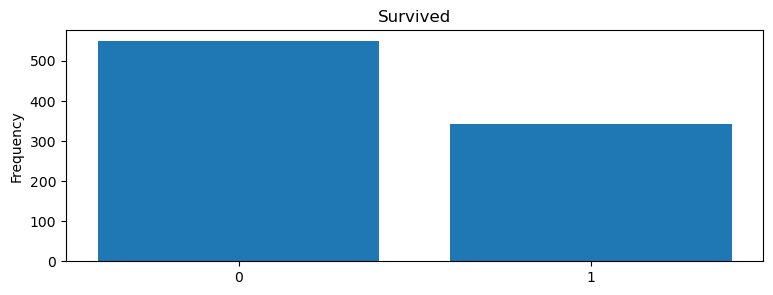

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


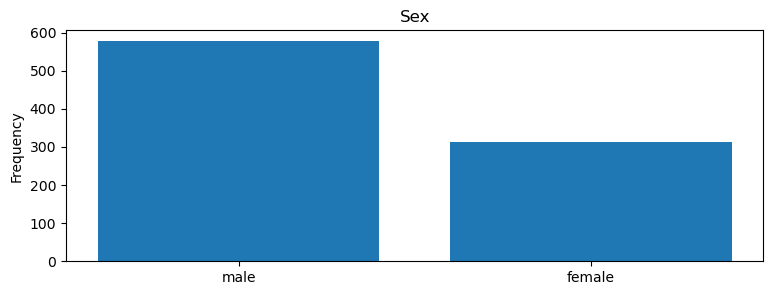

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


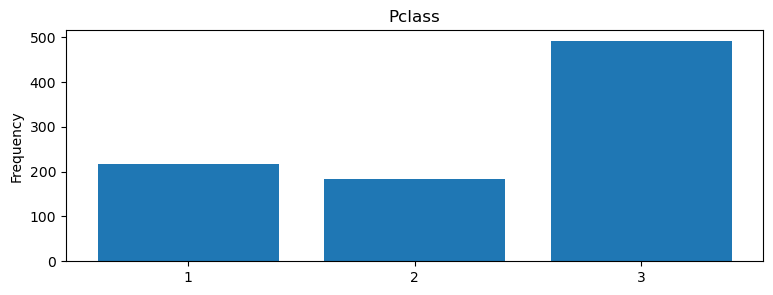

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


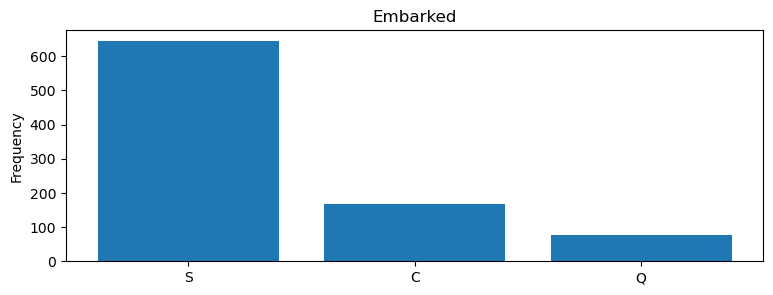

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


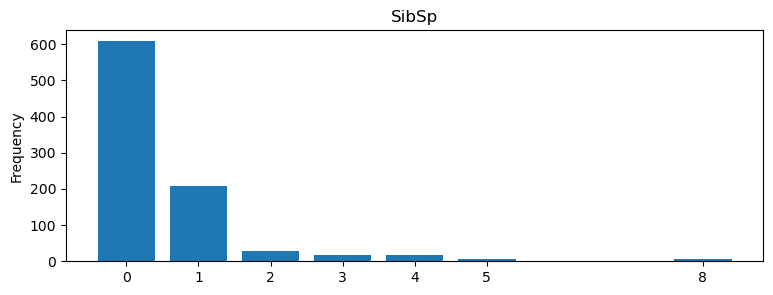

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


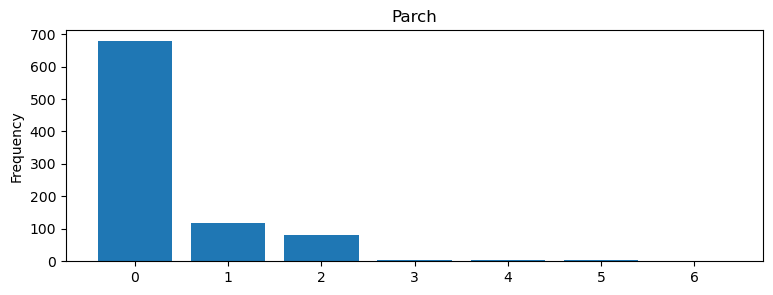

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
category1 = ["Survived","Sex","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [10]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64 

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64 



Numerical Variable


In [11]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

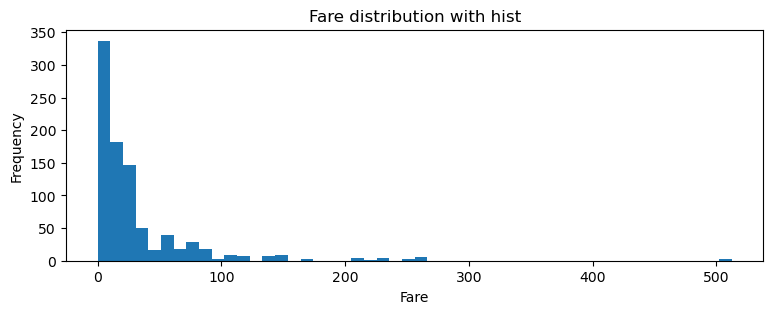

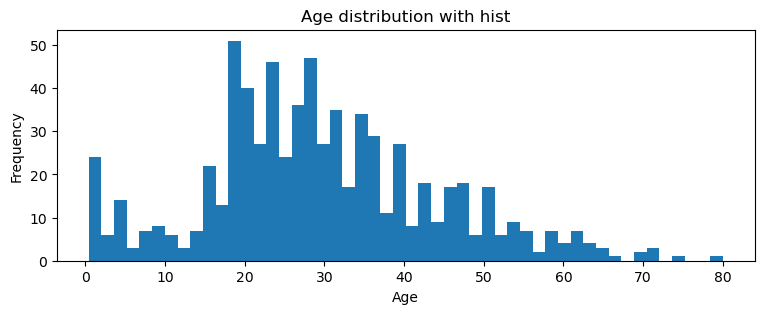

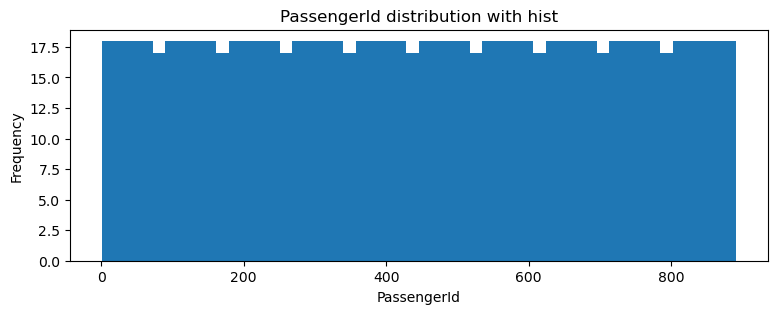

In [12]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

Basic Data Analysis


In [13]:
# Plcass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [14]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [15]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [16]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by="Survived",ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Outlier Detection


In [17]:
from collections import Counter
import numpy as np

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c], 25)
        # 3rd quartile
        Q3 = np.percentile(df[c], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # Detect outliers and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indices
        outlier_indices.extend(outlier_list_col)

    # Count occurrences of outliers
    outlier_indices = Counter(outlier_indices)
    # Filter indices where outlier occurs more than twice
    multiple_outliers = [i for i, v in outlier_indices.items() if v > 2]

    return multiple_outliers


In [18]:
train_df.loc[detect_outliers(train_df,["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [19]:
# drop outliers
train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

Missing Value


In [20]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [21]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Find Missing Value


In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

Fill Missing Value


In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


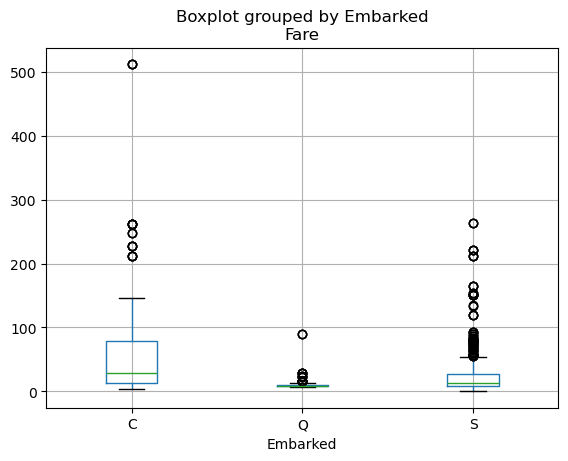

In [25]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [27]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [28]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [29]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Visualization


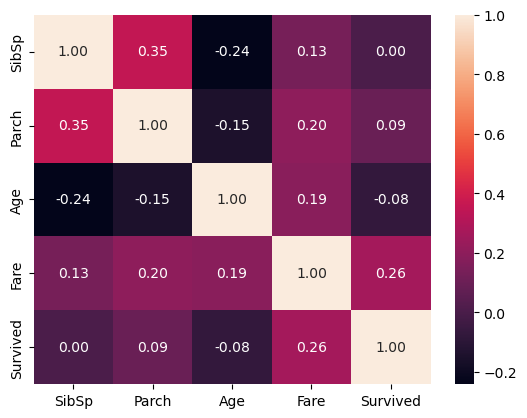

In [30]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

SibSp -- Survived


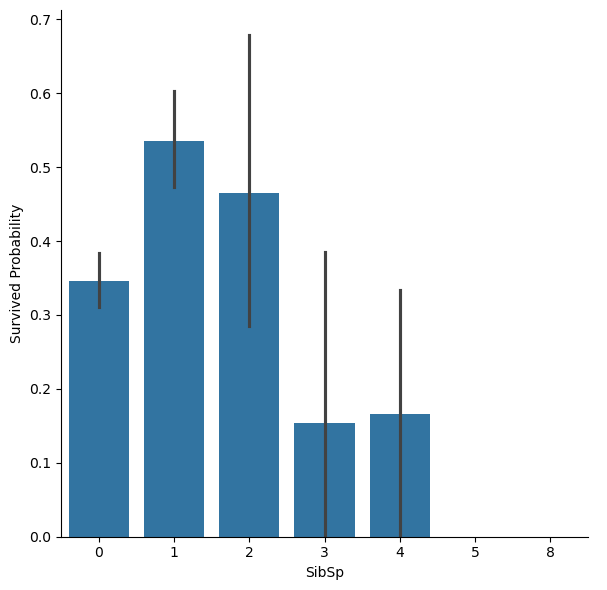

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot
g = sns.catplot(x="SibSp", y="Survived", data=train_df, kind="bar", height=6)

# Set y-axis label
g.set_axis_labels("SibSp", "Survived Probability")

# Show the plot
plt.show()


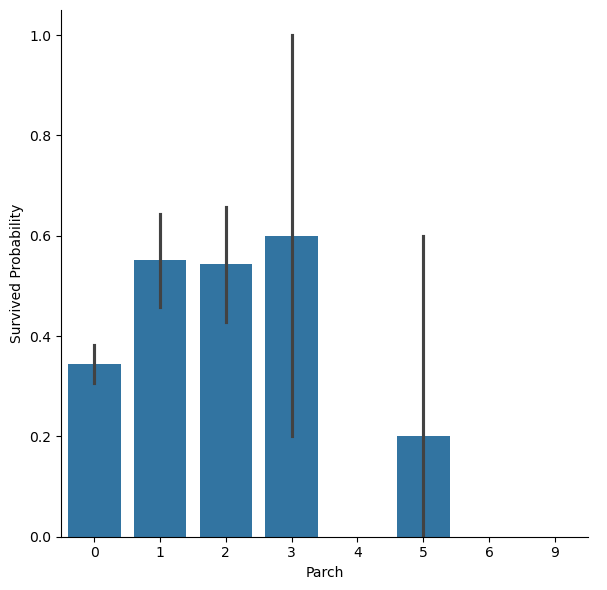

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot
g = sns.catplot(x="Parch", y="Survived", kind="bar", data=train_df, height=6)

# Set y-axis label
g.set_axis_labels("Parch", "Survived Probability")

# Show the plot
plt.show()


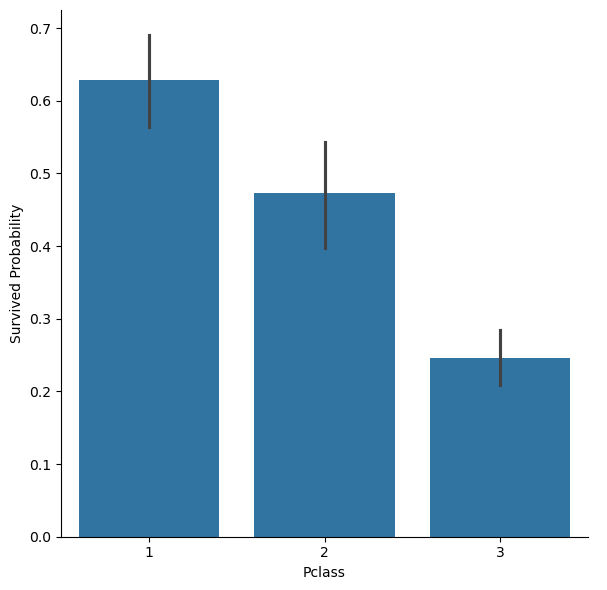

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot
g = sns.catplot(x="Pclass", y="Survived", data=train_df, kind="bar", height=6)

# Set y-axis label
g.set_axis_labels("Pclass", "Survived Probability")

# Show the plot
plt.show()


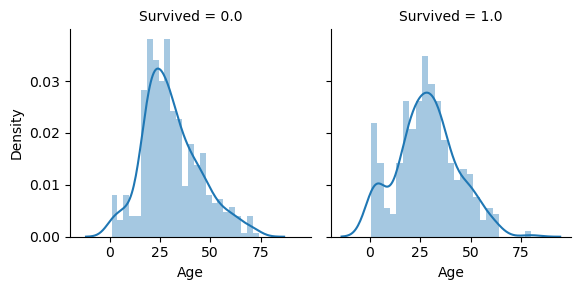

In [34]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

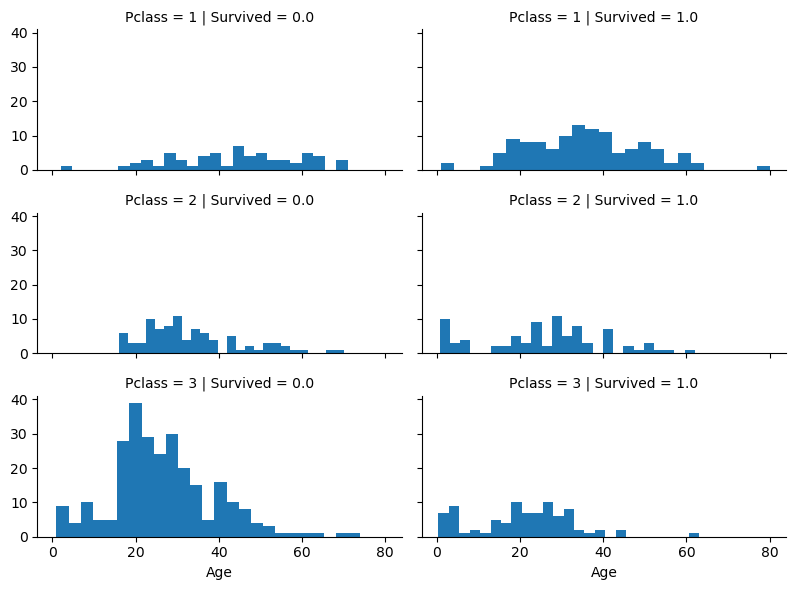

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with updated parameters
g = sns.FacetGrid(train_df, col="Survived", row="Pclass", height=2, aspect=2)

# Map the histogram function to the grid
g.map(plt.hist, "Age", bins=25)

# Add a legend
g.add_legend()

# Show the plot
plt.show()


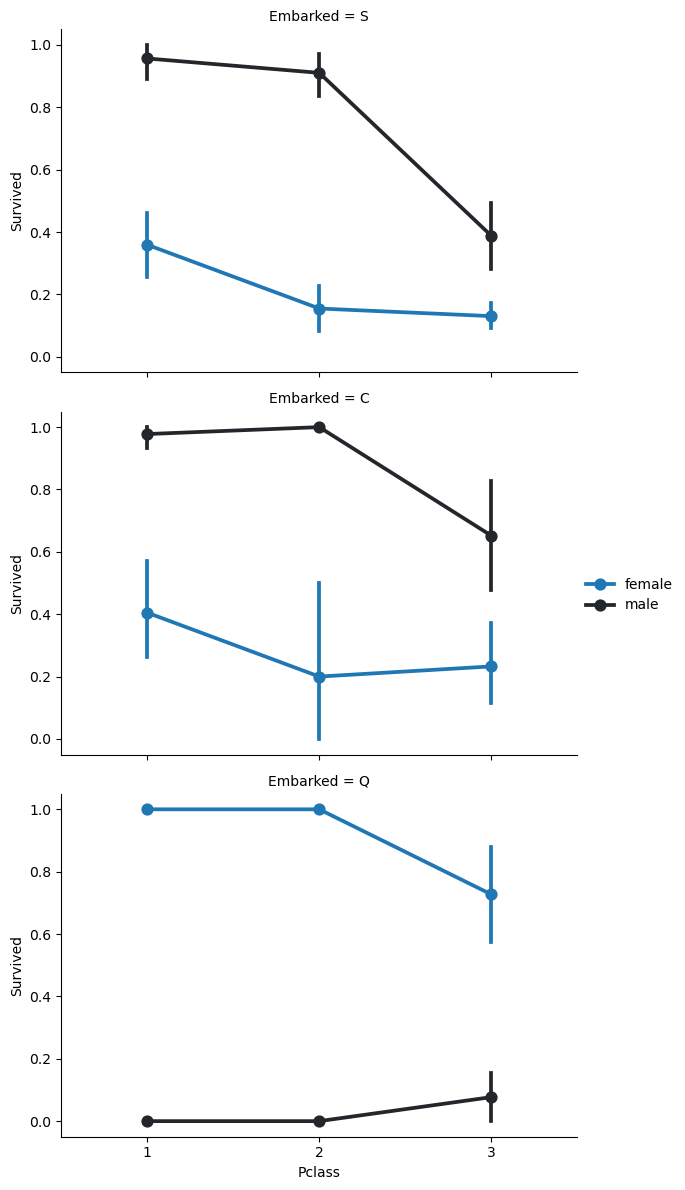

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with updated parameters
g = sns.FacetGrid(train_df, row="Embarked", height=4, aspect=1.5)

# Map the pointplot function to the grid with hue
g.map_dataframe(sns.pointplot, x="Pclass", y="Survived", hue="Sex")

# Add a legend
g.add_legend()

# Show the plot
plt.show()


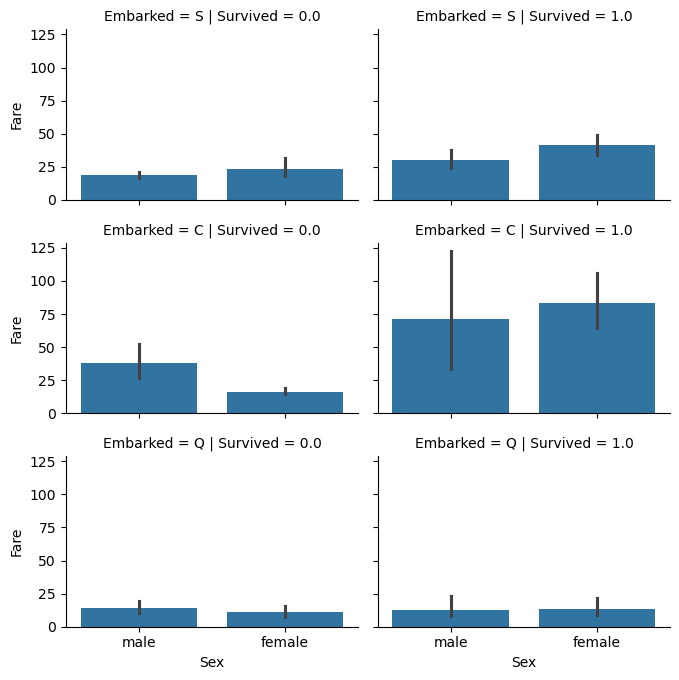

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a FacetGrid with updated parameters
g = sns.FacetGrid(train_df, row="Embarked", col="Survived", height=2.3, aspect=1.5)

# Map the barplot function to the grid
g.map(sns.barplot, "Sex", "Fare")

# Add a legend (not always necessary for bar plots; typically used if there's a hue)
# If you have a hue, you can add a legend
# g.add_legend()

# Show the plot
plt.show()


Fill Missing: Age Feature


In [38]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


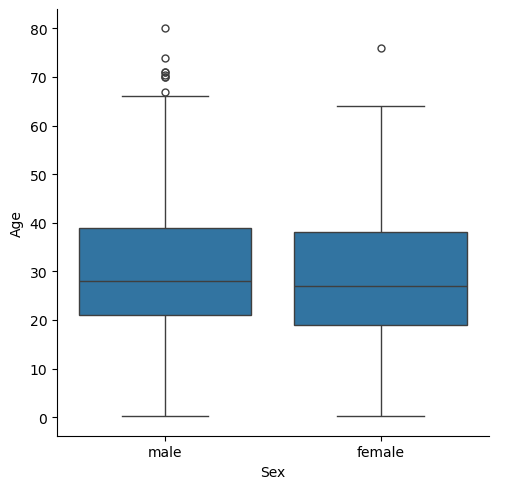

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot (box plot) using catplot
sns.catplot(x="Sex", y="Age", data=train_df, kind="box")

# Show the plot
plt.show()


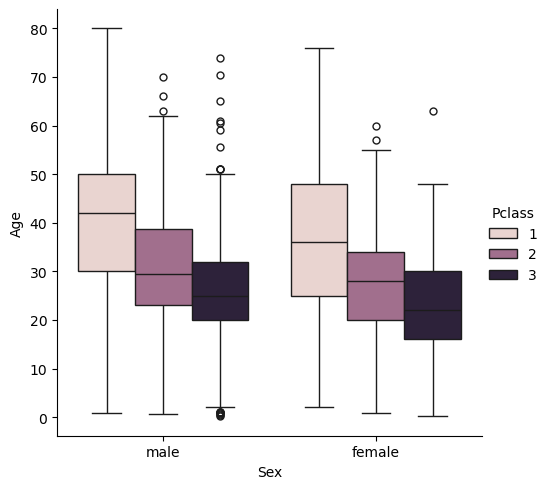

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a categorical plot (box plot) using catplot with hue
sns.catplot(x="Sex", y="Age", hue="Pclass", data=train_df, kind="box")

# Show the plot
plt.show()


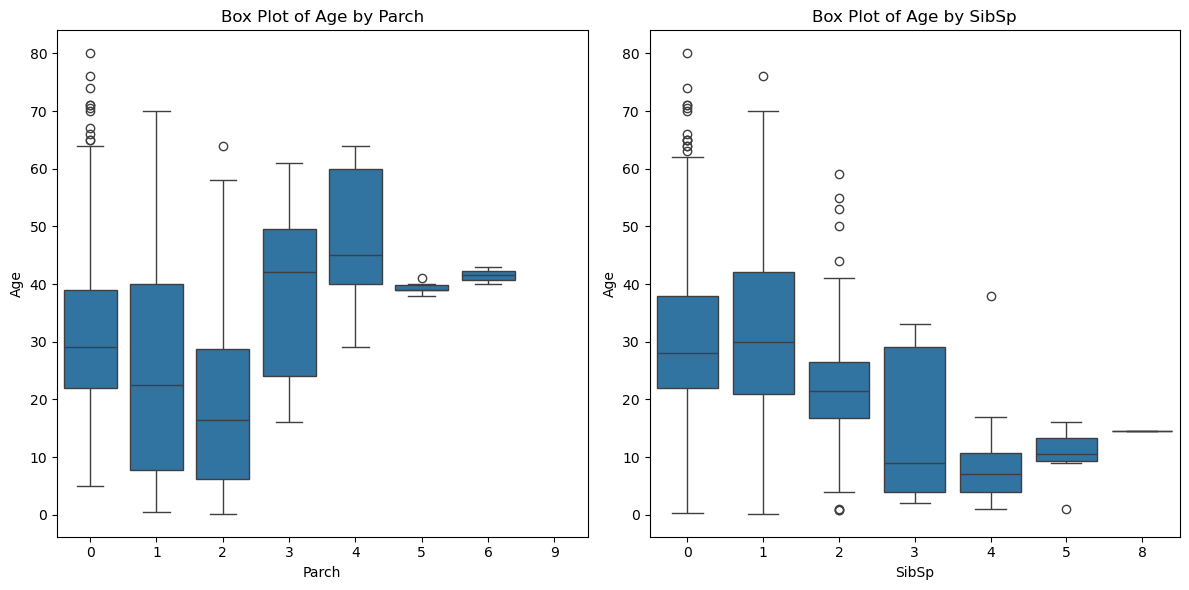

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create the first categorical plot (box plot) for Parch
sns.boxplot(x="Parch", y="Age", data=train_df, ax=axes[0])
axes[0].set_title("Box Plot of Age by Parch")

# Create the second categorical plot (box plot) for SibSp
sns.boxplot(x="SibSp", y="Age", data=train_df, ax=axes[1])
axes[1].set_title("Box Plot of Age by SibSp")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


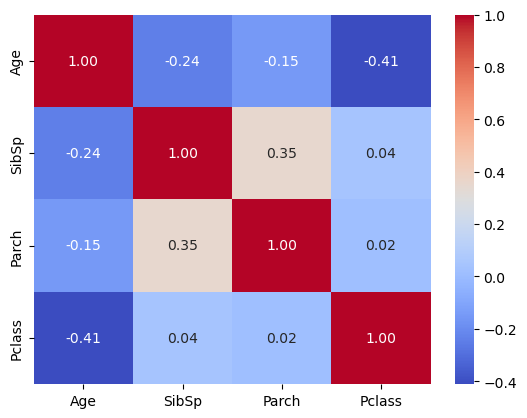

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation matrix
numeric_columns = ["Age", "SibSp", "Parch", "Pclass"]

# Calculate the correlation matrix
corr_matrix = train_df[numeric_columns].corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Show the plot
plt.show()


In [43]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med

In [44]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


Feature Engineering


In [45]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [46]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [47]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

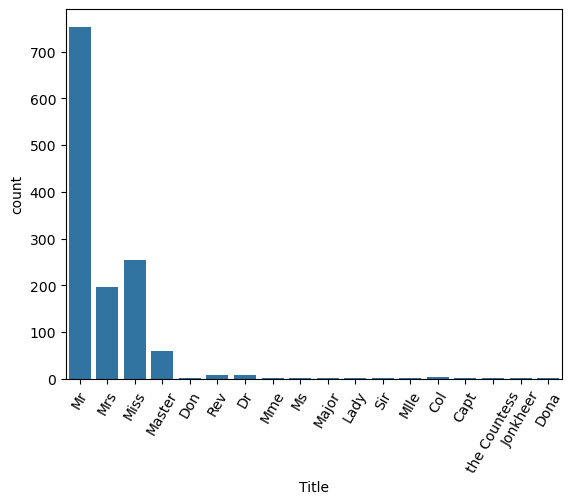

In [48]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

In [49]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

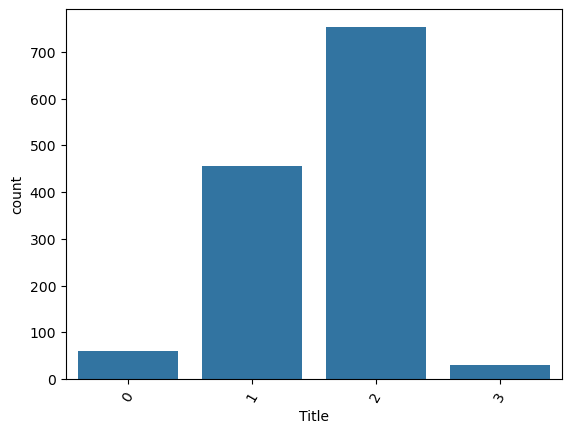

In [50]:
sns.countplot(x="Title", data = train_df)
plt.xticks(rotation = 60)
plt.show()

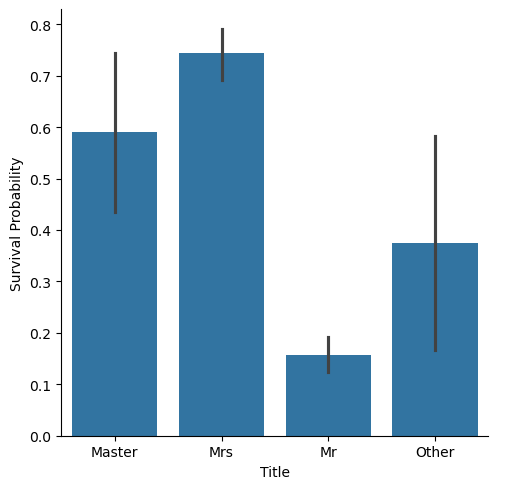

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot (bar plot) using catplot
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")

# Set x-axis labels
g.set_xticklabels(["Master", "Mrs", "Mr", "Other"])

# Set y-axis label
g.set_axis_labels("Title", "Survival Probability")

# Show the plot
plt.show()


In [52]:
train_df.drop(labels = ["Name"], axis = 1, inplace = True)

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [54]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


Family Size


In [58]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


In [59]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [60]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


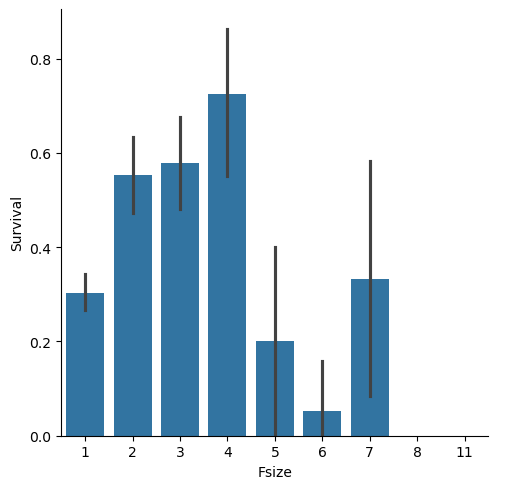

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot (bar plot) using catplot
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")

# Set y-axis label
g.set_axis_labels("Fsize", "Survival")

# Show the plot
plt.show()


In [64]:
train_df["family_size"] = [1 if i < 5 else 0 for i in train_df["Fsize"]]

In [65]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1
5,6,0.0,3,male,25.0,0,0,330877,8.4583,NaN,Q,False,False,True,False,1,1
6,7,0.0,1,male,54.0,0,0,17463,51.8625,E46,S,False,False,True,False,1,1
7,8,0.0,3,male,2.0,3,1,349909,21.0750,NaN,S,True,False,False,False,5,0
8,9,1.0,3,female,27.0,0,2,347742,11.1333,NaN,S,False,True,False,False,3,1
9,10,1.0,2,female,14.0,1,0,237736,30.0708,NaN,C,False,True,False,False,2,1


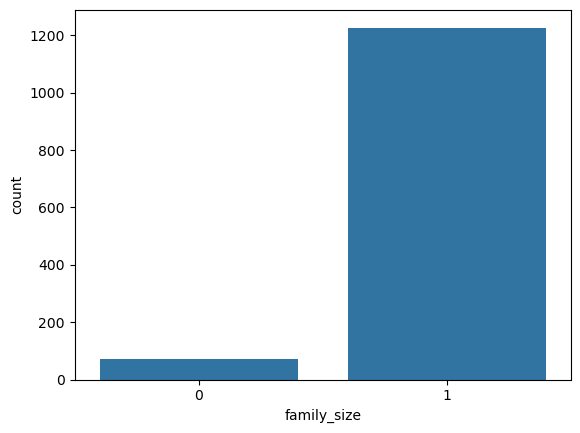

In [66]:
sns.countplot(x = "family_size", data = train_df)
plt.show()

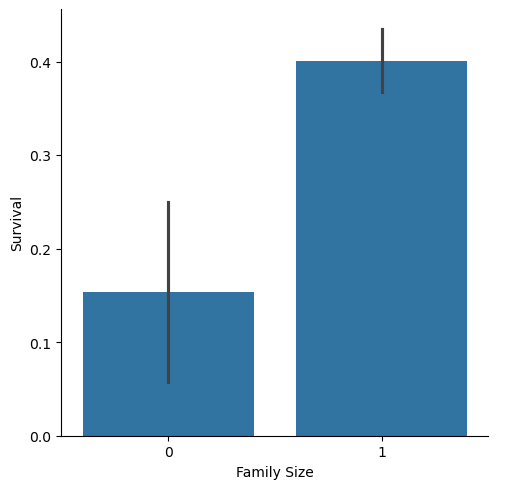

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the categorical plot (bar plot) using catplot
g = sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")

# Set y-axis label
g.set_axis_labels("Family Size", "Survival")

# Show the plot
plt.show()


In [69]:
train_df = pd.get_dummies(train_df, columns= ["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


Embarked


In [71]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

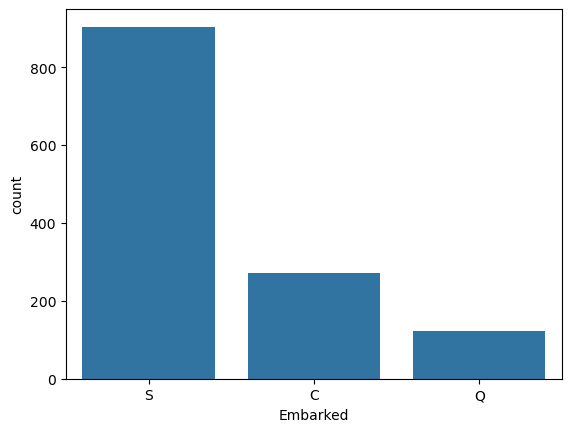

In [72]:
sns.countplot(x = "Embarked", data = train_df)
plt.show()

In [73]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


Ticket

In [75]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [77]:
a = "A/5. 2151"
a.replace(".","").replace("/","").strip().split(" ")[0]

'A5'

In [79]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [81]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [82]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,male,22.0,1,0,A5,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1.0,1,female,38.0,1,0,PC,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1.0,3,female,26.0,0,0,STONO2,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1.0,1,female,35.0,1,0,x,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0.0,3,male,35.0,0,0,x,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [83]:
train_df = pd.get_dummies(train_df, columns= ["Ticket"], prefix = "T")
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1.0,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1.0,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,True,False,False,False,False,False
3,4,1.0,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0.0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True
5,6,0.0,3,male,25.0,0,0,8.4583,NaN,False,...,False,False,False,False,False,False,False,False,False,True
6,7,0.0,1,male,54.0,0,0,51.8625,E46,False,...,False,False,False,False,False,False,False,False,False,True
7,8,0.0,3,male,2.0,3,1,21.0750,NaN,True,...,False,False,False,False,False,False,False,False,False,True
8,9,1.0,3,female,27.0,0,2,11.1333,NaN,False,...,False,False,False,False,False,False,False,False,False,True
9,10,1.0,2,female,14.0,1,0,30.0708,NaN,False,...,False,False,False,False,False,False,False,False,False,True


Pclass

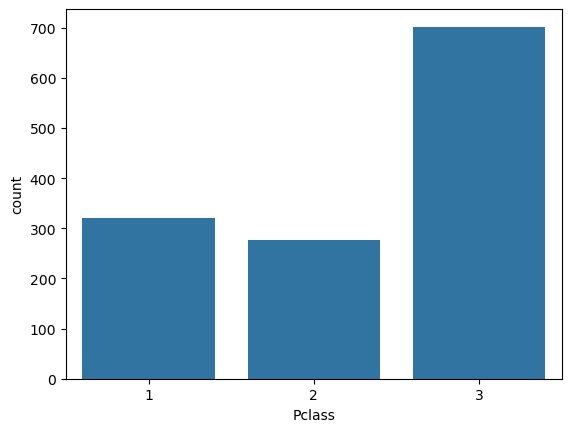

In [84]:
sns.countplot(x = "Pclass", data = train_df)
plt.show()

In [88]:
import pandas as pd

# Example DataFrame creation (replace with actual data loading code)
# train_df = pd.read_csv('path_to_your_file.csv')

# Print column names to verify 'Pclass' exists
print(train_df.columns)

# Check if 'Pclass' exists before performing operations
if 'Pclass' in train_df.columns:
    # Convert Pclass to categorical type
    train_df["Pclass"] = train_df["Pclass"].astype("category")

    # Perform one-hot encoding on the Pclass column
    train_df = pd.get_dummies(train_df, columns=["Pclass"])

    # Display the first few rows of the updated DataFrame
    print(train_df.head())
else:
    print("Column 'Pclass' does not exist in the DataFrame.")


Index(['PassengerId', 'Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Title_0', 'Title_1', 'Title_2', 'Title_3', 'Fsize',
       'family_size_0', 'family_size_1', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'T_A', 'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C',
       'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC',
       'T_PP', 'T_PPP', 'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW',
       'T_SCPARIS', 'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2',
       'T_SOTONOQ', 'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP',
       'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')
Column 'Pclass' does not exist in the DataFrame.


Drop Passenger ID and Cabin


In [89]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis = 1, inplace = True)

In [90]:
train_df.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Fsize', 'family_size_0',
       'family_size_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A',
       'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON',
       'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

Modeling

In [92]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [95]:
train_df_len

881

In [94]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

In [96]:
train = train_df[:train_df_len]
X_train = train.drop(labels = "Survived", axis = 1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.33, random_state = 42)
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))
print("test",len(test))

X_train 590
X_test 291
y_train 590
y_test 291
test 418


Simple Logistic Regression


In [100]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Example data preparation (ensure train_df and test_df are loaded properly)

# Check column names
print("Train Columns:", train_df.columns)
print("Test Columns:", test_df.columns)

# Encode categorical features
if 'Sex' in train_df.columns:
    label_encoder = LabelEncoder()
    train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
    test_df['Sex'] = label_encoder.transform(test_df['Sex'])
else:
    print("Column 'Sex' is missing.")

# One-hot encode categorical features if columns exist
if 'Embarked' in train_df.columns and 'Pclass' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['Embarked', 'Pclass'], drop_first=True)
    test_df = pd.get_dummies(test_df, columns=['Embarked', 'Pclass'], drop_first=True)
else:
    print("Columns 'Embarked' and/or 'Pclass' are missing.")

# Align columns in train and test data
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1)
y_test = test_df['Survived']

X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict and calculate accuracy
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

acc_log_train = round(accuracy_score(y_train, y_train_pred) * 100, 2)
acc_log_test = round(accuracy_score(y_test, y_test_pred) * 100, 2)

# Print the accuracy results
print("Training Accuracy: {}%".format(acc_log_train))
print("Testing Accuracy: {}%".format(acc_log_test))


Train Columns: Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0',
       'Title_1', 'Title_2', 'Title_3', 'Fsize', 'family_size_0',
       'family_size_1', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A',
       'T_A4', 'T_A5', 'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON',
       'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA3', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS',
       'T_SCParis', 'T_SOC', 'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ',
       'T_SP', 'T_STONO', 'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP',
       'T_x', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')
Test Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Columns 'Embarked' and/or 'Pclass' are missing.


KeyError: "['Survived'] not found in axis"

Hyperparameter Tuning -- Grid Search -- Cross Validation


In [101]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [103]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv_result = []
best_estimators = []

for i in range(len(classifier)):
    # Initialize GridSearchCV for the current classifier
    clf = GridSearchCV(
        estimator=classifier[i],
        param_grid=classifier_param[i],
        cv=StratifiedKFold(n_splits=10),
        scoring="accuracy",
        n_jobs=-1,
        verbose=1
    )
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)
    
    # Store the best score and the best estimator
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    
    # Print the results
    print(f"Classifier {i}: Best CV Score = {cv_result[i]}")


Fitting 10 folds for each of 250 candidates, totalling 2500 fits


ValueError: Input y contains NaN.

Ensemble Modeling


Prediction and Submission
